## Tarea 2 Reglas de Asociación

Utilizaremos datos de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH). 2018 Nueva serie.

> La Encuesta Nacional de Ingresos y Gastos de los Hogares 2018 se llevó a cabo del 21 de agosto al 28 de noviembre de 2018. Su objetivo es proporcionar un panorama estadístico del comportamiento de los ingresos y gastos de los hogares en cuanto a su monto, procedencia y distribución; adicionalmente, ofrece información sobre las características ocupacionales y sociodemográficas de los integrantes del hogar, así como las características de la infraestructura de la vivienda y el equipamiento del hogar

Para descargar los datos de la tarea  entrar  en la carpeta de datos del repositorio de la clase.

Los datos para la tarea constande 2 tablas, la tabla de gastos y la tabla de hogares. La primera incluye los gastos de los hogares y la segunda datos sociodemograficos de los hogares (notar que dentro de una vivienda puede haber más de un hogar).

**Objetivo de la tarea**. Identificar reglas de asociación asociadas a ingresos altos de los hogares. Nota: Ustedes decidirán a partir de que valor se considera ingreso alto para un hogar

Si desean consultar mayor detalle de la encuesta ir al siguiente link [ENIGH](https://www.inegi.org.mx/programas/enigh/nc/2018/)

In [ ]:
# Librerías
import pandas as pd
import numpy as np

In [ ]:
# Leer los datos de Gasto
valores_missing = ['', ' ']
gasto = pd.read_csv("/home/leonardo/Documentos/Acatlan/enigh/conjunto_de_datos_gastoshogar_enigh_2018_ns.csv", \
                    usecols= [0,1,14], na_values = valores_missing)
gasto.head()

,folioviv,foliohog,gasto
0,100013601,1,30.0
1,100013601,1,84.0
2,100013601,1,60.0
3,100013601,1,33.0
4,100013601,1,2400.0


In [ ]:
gasto.shape

(1048575, 3)

Colapsar la información a nivel hogar

In [ ]:
# Colapsar la info a nivel hogar
gasto_x_hogar =gasto.groupby(['folioviv','foliohog']).agg({'gasto':['sum']})
gasto_x_hogar.head()

,,gasto
,,sum
folioviv,foliohog,
100013601,1,2607.0
100013602,1,23696.0
100013603,1,38780.0
100013604,1,7428.0
100013606,1,2547.0


In [ ]:
gasto_x_hogar.shape

(44250, 1)

Crear variable indicadora para determinar un 'ingreso alto' de un hogar. Esto usualmente va alineado con las reglas del negocio o el problema que estás resolviendo 

**Definir valor para ingreso alto**. Enuncia el porque de tu valor o incluye la referencia si utilizaste alguna

In [ ]:
# Incluye tu justificación para el ingreso aquí

In [ ]:
ingreso_alto = 50000 #Ingresar tu valor de ingreso alto aquí

In [ ]:
gasto_x_hogar['ingreso_alto'] = gasto_x_hogar['gasto']['sum'].map(lambda x: x > ingreso_alto)

# Borrar la variable gasto
del gasto_x_hogar['gasto']


In [ ]:
gasto_x_hogar.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44250 entries, (100013601, 1) to (1909929214, 1)
Data columns (total 1 columns):
(ingreso_alto, )    44250 non-null bool
dtypes: bool(1)
memory usage: 599.6 KB


In [ ]:
# Hacer el aggregate de la info generó vaiables multinivel por ello se reasignó el nombre de las columnas
# gasto_x_hogar.columns = ['foliohog', 'folioviv', 'ingreso_alto']
gasto_x_hogar.columns = ['ingreso_alto']

In [ ]:
gasto_x_hogar.head(10)

,,ingreso_alto
folioviv,foliohog,
100013601,1,False
100013602,1,False
100013603,1,False
100013604,1,False
100013606,1,False
100026701,1,False
100026703,1,False
100026704,1,True
100026706,1,False


Sólo utilizaremos ciertas variables de la tabla de hogares. El detalle de las variables de la tabla de hogares puede ser cnsultado en el diccionario de datos ubicado en la carpeta de los datos

Las variables autilizar son:

- folioviv: Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6; rural, código 6), cuatro dígitos del número consecutivo de la upm, un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada.
- foliohog:	El código 1 identifica al hogar principal y del 2 al 5 los hogares adicionales.
- alim17_1:	Número de días que comieron alimentos hechos de maíz, trigo, arroz, avena, salvado, etcétera, durante la última semana.
- alim17_2:	Número de días que comieron alimentos provenientes de raíces o tubérculos, durante la última semana.
- alim17_3:	Número de días que comieron verduras durante la última semana.
- alim17_4:	Número de días que comieron frutas durante la última semana.
- alim17_5:	Número de días que comieron carne durante la última semana.
- alim17_6:	Número de días que comieron huevo durante la última semana.
- alim17_7:	Número de días que comieron pescado o mariscos durante la última semana.
- alim17_8:	Número de días que comieron leguminosas o semillas durante la última semana.
- alim17_9:	Número de días que comieron productos lácteos durante la última semana.
- alim17_10:	Número de días que comieron aceites o grasas durante la última semana.
- alim17_11:	Número de días que comieron azúcar o mieles durante la última semana.
- alim17_12:	Número de días que comieron otros alimentos como condimentos, café, té durante la última semana.

- telefono:	Servicio de línea telefónica en el hogar ya sea con instalación alámbrica o satelital (antena). 
- celular:	Hogares que cuentan con el servicio de teléfono móvil aunque sea un sólo integrante del hogar.
- tv_paga:	Hogares que cuentan con los servicios de televisión por pago, considerando que el servicio está en funcionamiento.
- conex_inte:	Hogares que cuentan con el servicio de línea telefónica, tarjeta prepagada o telecable.

- num_auto:	Número de automóviles con los que cuenta el hogar.
- num_van:	Número de camionetas cerradas o con cabina (van o minivan) con las que cuenta el hogar.
- num_pickup:	Número de camionetas con caja con las que cuenta el hogar.
- num_moto:	Número de motocicletas o motonetas con las que cuenta el hogar.
- num_bici:	Número de bicicletas que se utilicen como medio de transporte en el hogar.
- num_trici:	Número de triciclos que se utilicen como medio de transporte en el hogar.
- num_carret:	Número de carretas, calandrias u otros vehículos de tracción animal con los que cuenta el hogar.
- num_canoa:	Número de canoas, lanchas, trajineras u otros vehículos para navegar con los que cuenta el hogar.
- num_otro:	Número de otro tipo de vehículos con los que cuenta el hogar.
- num_ester:	Número de estéreos, modulares o minicomponentes con los que cuenta el hogar.
- num_grab:	Número de grabadoras con las que cuenta el hogar.
- num_radio:	Número de radios con las que cuenta el hogar.
- num_tva:	Número de televisores analógicos con los que cuenta el hogar.
- num_tvd:	Número de televisores digitales con los que cuenta el hogar.
- num_dvd:	Número de DVDs, Blu-ray (reproductores de discos de video) con los que cuenta el hogar.
- num_video:	Número de videocaseteras con las que cuenta el hogar.
- num_licua:	Número de licuadoras con las que cuenta el hogar.
- num_tosta:	Número de tostadores con los que cuenta el hogar.
- num_micro:	Número de hornos de microondas con los que cuenta el hogar.
- num_refri:	Número de refrigeradores con los que cuenta el hogar.
- num_estuf:	Número de estufas de gas o eléctricas con las que cuenta el hogar.
- num_lavad:	Número de lavadoras con las que cuenta el hogar.
- num_planc:	Número de planchas eléctricas con las que cuenta el hogar.
- num_maqui:	Número de máquinas de coser con las que cuenta el hogar.
- num_venti:	Número de ventiladores con los que cuenta el hogar.
- num_aspir:	Número de aspiradoras con las que cuenta el hogar.
- num_compu:	Número de computadoras con las que cuenta el hogar.
- num_impre:	Número de impresoras con las que cuenta el hogar.
- num_juego:	Número de videojuegos (Wii, Playstation, Xbox, otros) con los que cuenta el hogar.


In [ ]:
# Leer los datos de los hogares
valores_missing = ['', ' ']
hogares = pd.read_csv("/home/leonardo/Documentos/Acatlan/enigh/conjunto_de_datos_hogares_enigh_2018_ns.csv", \
                    index_col= [0,1], \
                    usecols= [0, 1, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, \
                              41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, \
                              77, 79, 81, 83, 85, 87, 89, 91, 93, 95], \
                      na_values = valores_missing)
hogares.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_refri,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,7,1,7,7,4,7,1,7,7,7,...,1.0,1.0,1.0,1.0,1,1.0,1,1,0,0
100013602,1,7,3,4,3,3,2,0,5,7,5,...,1.0,1.0,1.0,1.0,1,1.0,1,2,1,1
100013603,1,4,2,5,4,5,3,2,2,3,4,...,1.0,1.0,1.0,1.0,0,1.0,0,1,0,0
100013604,1,7,3,7,7,4,7,1,5,2,7,...,1.0,1.0,1.0,1.0,1,5.0,0,0,0,0
100013606,1,7,1,1,7,3,7,0,2,7,7,...,1.0,1.0,1.0,1.0,0,0.0,0,0,0,0


In [ ]:
hogares.shape

(74647, 45)

La librería que usaremos para obtener las reglas de asociación requiere un Data Frame con variables Booleanas por tal motivo las transformaremos 

**Nota.** Recordar que en reglas de asociación, nos interesa que la 'canasta' contenga el item y no el número de items

In [ ]:
# Transformar a valores Booleanos
hogares_bool = hogares > 0

Unir el valor de gasto por hogar a la tabla de hogares

In [ ]:
#help(pd.merge)

In [ ]:
#union = hogares.merge(gasto_x_hogar, how='left', left_on= ['folioviv','foliohog'], right_on=['folioviv','foliohog'])
union = hogares_bool.merge(gasto_x_hogar, how='left', left_index=True, right_index=True)
union.shape

(74647, 46)

In [ ]:
union.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,False
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [ ]:
# Checar la cantidad de missings para la variable gasto
union.ingreso_alto.isnull().sum()

30397

In [ ]:
# filtrar donde no haya missings
datos = union[union.ingreso_alto.notnull()]
datos["ingreso_alto"] = datos["ingreso_alto"].astype(bool)
datos.shape

/home/leonardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(44250, 46)

In [ ]:
datos.head()

,,alim17_1,alim17_2,alim17_3,alim17_4,alim17_5,alim17_6,alim17_7,alim17_8,alim17_9,alim17_10,...,num_estuf,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_impre,num_juego,ingreso_alto
folioviv,foliohog,,,,,,,,,,,,,,,,,,,,,
100013601,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
100013602,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
100013603,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,False,True,False,False,False
100013604,1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
100013606,1,True,True,True,True,True,True,False,True,True,True,...,True,True,True,False,False,False,False,False,False,False


In [ ]:
# Revisar cuantos registros tienen ingreso alto
datos.ingreso_alto.sum()

1605

Para comenzar a hacer pruebas pueden trabajar con una muestra de los datos.

In [ ]:
# help(pd.DataFrame.sample)

In [ ]:
datos_muestra = datos.sample(n=10000, random_state = 202011)

**Ejercicio 1**

Experimentar con diferentes niveles de soporte, confianza y lift para encotrar reglas de asociación que les hagan sentido considerando la variable ingreso_alto como **consecuente**

In [ ]:
#!pip install mlxtend 

In [ ]:
# Importat las funciones a utilizar
from mlxtend.frequent_patterns import apriori, association_rules

Experimentar con distintos niveles de soporte y el máximo número elementos en los itemsets.

Nota. Para saber el soporte de cada variable individual se puede ejecutar datos.mean()

La opción de low_memory nos permite ejecutar el algoritmo para datos 'grandes' cuando nuestros recursos de memoria son limitados pero toma más tiempo ejecutarse

In [ ]:
#help(apriori)

In [ ]:
# Usar el algoritmo Apriori para obtener itemsets frecuentes
frequent_itemsets = apriori(datos, 
                            min_support = 0.01, 
                            max_len = 4, 
                            use_colnames = True,
                            low_memory = True) 

In [ ]:
print(frequent_itemsets.shape)
print(frequent_itemsets.head())

(99366, 2)
    support    itemsets
0  0.995458  (alim17_1)
1  0.836565  (alim17_2)
2  0.943119  (alim17_3)
3  0.895706  (alim17_4)
4  0.925605  (alim17_5)


Experimentar con distintos valores (pueden variar la métrica si lo consideran adecuado)

In [ ]:
# Generar reglas de asociación con un nivel mínimo de confianza
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

In [ ]:
print(rules.shape)
print(rules.head())

(1297244, 9)
  antecedents consequents  antecedent support  consequent support   support  \
0  (alim17_1)  (alim17_2)            0.995458            0.836565  0.835096   
1  (alim17_2)  (alim17_1)            0.836565            0.995458  0.835096   
2  (alim17_1)  (alim17_3)            0.995458            0.943119  0.940972   
3  (alim17_3)  (alim17_1)            0.943119            0.995458  0.940972   
4  (alim17_4)  (alim17_1)            0.895706            0.995458  0.893401   

   confidence      lift  leverage  conviction  
0    0.838907  1.002799  0.002331    1.014536  
1    0.998244  1.002799  0.002331    2.586916  
2    0.945265  1.002276  0.002137    1.039223  
3    0.997724  1.002276  0.002137    1.995440  
4    0.997427  1.001978  0.001764    1.765068  


Notar que el número de reglas puede ser mucho mayor que el número de itemsets frecuentes

Filtrar las reglas donde el consecuente es la variable ingreso alto

In [ ]:
rules_income_consecuent = rules[rules['consequents'] == {'ingreso_alto'}]
rules_income_consecuent.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,(alim17_1),(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866
160,(alim17_2),(ingreso_alto),0.836565,0.036271,0.031345,0.037468,1.033003,0.001001,1.001244
238,(alim17_3),(ingreso_alto),0.943119,0.036271,0.035684,0.037836,1.043136,0.001476,1.001626
314,(alim17_4),(ingreso_alto),0.895706,0.036271,0.035051,0.039132,1.078875,0.002563,1.002977
388,(alim17_5),(ingreso_alto),0.925605,0.036271,0.035548,0.038405,1.058835,0.001975,1.002219


In [ ]:
rules_income_consecuent.shape

(4854, 9)

Notar que el número de reglas puede ser mucho mayor que el número de itemsets frecuentes

La siguiente gráfica puede servir para identificar puntos de corte para filtrar reglas. 

In [ ]:
# Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns

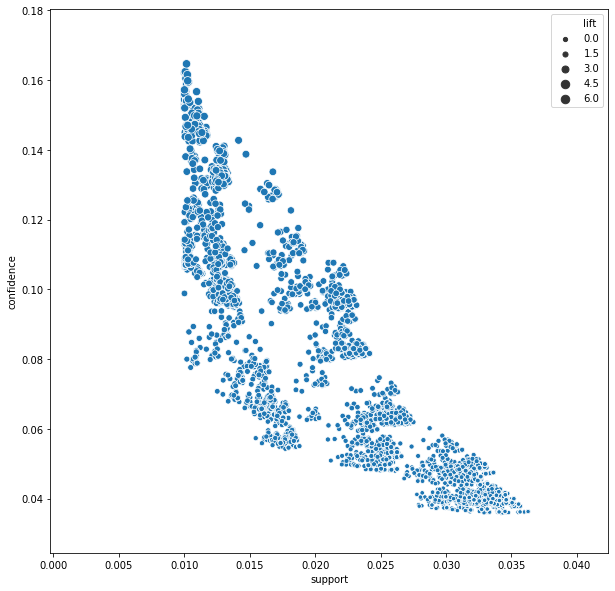

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = "support", y = "confidence", size = "lift", data = rules_income_consecuent)

plt.show()

Experimentar con distintos niveles de de soporte, confianza y lift

In [ ]:
filtered_rules = rules_income_consecuent[(rules_income_consecuent['support'] > 0.00) &
                (rules_income_consecuent['confidence'] > 0.10) &
                (rules_income_consecuent['lift'] >= 2)]

In [ ]:
print(filtered_rules.shape)

(1168, 9)


In [ ]:
print(filtered_rules)

                               antecedents     consequents  \
1673                           (num_aspir)  (ingreso_alto)   
1682                           (num_impre)  (ingreso_alto)   
1684                           (num_juego)  (ingreso_alto)   
6457                 (alim17_1, num_aspir)  (ingreso_alto)   
6486                 (num_impre, alim17_1)  (ingreso_alto)   
...                                    ...             ...   
1296796  (num_impre, num_compu, num_lavad)  (ingreso_alto)   
1296992  (num_planc, num_venti, num_compu)  (ingreso_alto)   
1297020  (num_planc, num_impre, num_venti)  (ingreso_alto)   
1297090  (num_planc, num_impre, num_compu)  (ingreso_alto)   
1297216  (num_impre, num_venti, num_compu)  (ingreso_alto)   

         antecedent support  consequent support   support  confidence  \
1673               0.067186            0.036271  0.010282    0.153044   
1682               0.102282            0.036271  0.013379    0.130800   
1684               0.098079         

**Describir hallazgos**

In [ ]:
## Redactar aquí

**Ejercicio 2**

La siguiente métrica propuesta por Zhang T. permite medir un grado de asociación entre el antecedente y el consecuente. Un par de propiedades para está métrica son:

- Toma valores entre -1 y +1
- Valores cercanos a +1 indican asociación positiva alta
- Valores cercanos a -1 indican asociación negativa alta
- Sólo se requiere utilizar el soporte para construirla

**Calcular la métrica de Zhang a la tabla rules_income_consecuent**

$$zhang(A \to B) = \frac{support(A \cup B) - support(A)*support(B)}{max[support(A \cup B)*(1 - support(A)),support(A)*(support(B) - support(A \cup B))]}$$

In [ ]:
#import numpy as np

#def zhang(data):
#    support_AB = data['support'].copy()
#    support_A = data['antecedent support'].copy()
#    support_B = data['consequent support'].copy()
#    numerador = support_AB - support_A*support_B
#    denominador = np.max((support_AB*(1-support_A).values,support_A*(support_B-support_AB).values), axis = 0)
#    return numerador / denominador  


In [ ]:
support_AB = rules_income_consecuent['support'].copy()
support_A = rules_income_consecuent['antecedent support'].copy()
support_B = rules_income_consecuent['consequent support'].copy()
    

In [ ]:
numerador = support_AB - support_A*support_B
denominador = np.max((support_AB*(1-support_A).values,support_A*(support_B-support_AB).values), axis = 0)
    

In [ ]:
zhang = numerador / denominador

In [ ]:
zhang.shape

(4854,)

In [ ]:
print(zhang.min())
print(zhang.max())
print(zhang.mean())

-0.44119573132718515
0.8332027413861551
0.6533617301635309


In [ ]:
#zhang > 0.8

In [ ]:
#zhang < - 0.9

In [ ]:
zhang.index

Int64Index([     80,     160,     238,     314,     388,     460,     530,
                598,     664,     728,
            ...
            1296390, 1296474, 1296502, 1296698, 1296726, 1296796, 1296992,
            1297020, 1297090, 1297216],
           dtype='int64', length=4854)

In [ ]:
rules_income_consecuent.index

Int64Index([     80,     160,     238,     314,     388,     460,     530,
                598,     664,     728,
            ...
            1296390, 1296474, 1296502, 1296698, 1296726, 1296796, 1296992,
            1297020, 1297090, 1297216],
           dtype='int64', length=4854)

**Utilizar la métrica de Zhang para encontrar asociaciones negativas altas y asociaciones positivas altas**

In [ ]:
rules_income_consecuent['zhangs_metric'] = zhang

/home/leonardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rules_income_consecuent[zhang > 0.8]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1452,(num_tvd),(ingreso_alto),0.708723,0.036271,0.033627,0.047447,1.308131,0.007921,1.011733,0.808683
1673,(num_aspir),(ingreso_alto),0.067186,0.036271,0.010282,0.153044,4.219439,0.007846,1.137874,0.817957
1678,(num_compu),(ingreso_alto),0.242667,0.036271,0.023164,0.095455,2.631714,0.014362,1.065430,0.818688
1682,(num_impre),(ingreso_alto),0.102282,0.036271,0.013379,0.130800,3.606163,0.009669,1.108754,0.805038
6457,"(alim17_1, num_aspir)",(ingreso_alto),0.066825,0.036271,0.010215,0.152858,4.214299,0.007791,1.137623,0.817331
...,...,...,...,...,...,...,...,...,...,...
1296726,"(num_impre, num_venti, num_lavad)",(ingreso_alto),0.069130,0.036271,0.010169,0.147107,4.055751,0.007662,1.129953,0.809390
1296796,"(num_impre, num_compu, num_lavad)",(ingreso_alto),0.092226,0.036271,0.012384,0.134281,3.702135,0.009039,1.113212,0.804039
1297020,"(num_planc, num_impre, num_venti)",(ingreso_alto),0.069017,0.036271,0.010124,0.146693,4.044336,0.007621,1.129404,0.808544
1297090,"(num_planc, num_impre, num_compu)",(ingreso_alto),0.092678,0.036271,0.012429,0.134114,3.697525,0.009068,1.112997,0.804068


In [ ]:
rules_income_consecuent[zhang < -0.4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
80,(alim17_1),(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
4164,"(telefono, alim17_1)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
4332,"(alim17_1, celular)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
4494,"(tv_paga, alim17_1)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
4650,"(conex_inte, alim17_1)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
153444,"(telefono, alim17_1, celular)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
153822,"(telefono, tv_paga, alim17_1)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
154186,"(telefono, conex_inte, alim17_1)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
158862,"(tv_paga, alim17_1, celular)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196
159226,"(conex_inte, alim17_1, celular)",(ingreso_alto),0.995458,0.036271,0.035977,0.036142,0.996426,-0.000129,0.999866,-0.441196


In [ ]:
#Revisar que valor toma el valor de la métrica zhang cuando el lift es mayor a 2
check = (rules_income_consecuent[rules_income_consecuent['lift'] > 2])
print(check)

                               antecedents     consequents  \
1120                            (num_auto)  (ingreso_alto)   
1166                             (num_van)  (ingreso_alto)   
1554                           (num_tosta)  (ingreso_alto)   
1673                           (num_aspir)  (ingreso_alto)   
1678                           (num_compu)  (ingreso_alto)   
...                                    ...             ...   
1296796  (num_impre, num_compu, num_lavad)  (ingreso_alto)   
1296992  (num_planc, num_venti, num_compu)  (ingreso_alto)   
1297020  (num_planc, num_impre, num_venti)  (ingreso_alto)   
1297090  (num_planc, num_impre, num_compu)  (ingreso_alto)   
1297216  (num_impre, num_venti, num_compu)  (ingreso_alto)   

         antecedent support  consequent support   support  confidence  \
1120               0.296068            0.036271  0.024158    0.081597   
1166               0.139751            0.036271  0.013763    0.098480   
1554               0.147797         

In [ ]:
datos.mean()

alim17_1        0.995458
alim17_2        0.836565
alim17_3        0.943119
alim17_4        0.895706
alim17_5        0.925605
alim17_6        0.943910
alim17_7        0.510418
alim17_8        0.966531
alim17_9        0.901379
alim17_10       0.985808
alim17_11       0.950734
alim17_12       0.896023
telefono        1.000000
celular         1.000000
tv_paga         1.000000
conex_inte      1.000000
num_auto        0.296068
num_van         0.139751
num_pickup      0.124746
num_moto        0.090147
num_bici        0.151073
num_trici       0.009853
num_carret      0.002554
num_canoa       0.002531
num_otro        0.001672
num_ester       0.341627
num_grab        0.127390
num_radio       0.207006
num_tva         0.370418
num_tvd         0.708723
num_dvd         0.266305
num_video       0.040203
num_licua       0.872565
num_tosta       0.147797
num_micro       0.444136
num_refri       0.880565
num_estuf       0.903277
num_lavad       0.694847
num_planc       0.749424
num_maqui       0.134667


In [ ]:
check_lift = rules_income_consecuent[(rules_income_consecuent['support'] > 0.0) &
                (rules_income_consecuent['confidence'] > 0.0) &
                (rules_income_consecuent['lift'] >= 4.5)]

In [ ]:
check_lift.shape

(1, 10)

In [ ]:
check_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1216674,"(num_impre, num_auto, num_tvd)",(ingreso_alto),0.061763,0.036271,0.010169,0.164654,4.539532,0.007929,1.153689,0.83104
